In [6]:
import networkx as nx
import cenpy
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily

In [11]:
ct = "Connecticut, USA"
ct_NewH = ['New Haven County, Connecticut, USA']
ct_Mids = ['Middlesex County, Connecticut, USA']
ct_Tola = ['Tolland County, Connecticut, USA']
ct_Hart = ['Hartford County, Connecticut, USA']
ct_Fair = ['Fairfield County, Connecticut, USA']
          #{'city':'Los Altos Hills', 'state':'California'},
          #'Loyola, California']

desired_building_types = ['house','roof','apartments','residential','cabin','detached','semidetached_house',
                               'stilt house','condominium','static_caravan']


In [12]:
def footprint_squarefeet(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    building_geometries_series = gpd.GeoSeries(bldgs.geometry)
    total_footprint_area = building_geometries_series.area.sum()
    projected_crs = 'EPSG:6433'
    building_geometries_projected = bldgs.to_crs(projected_crs)
    total_footprint_area_projected = building_geometries_projected.area.sum()
    
    #print("Total Building Footprint Area:", total_footprint_area)
    #print("Total Building Footprint Area (Projected):", total_footprint_area_projected) #square feet
    return total_footprint_area_projected

In [13]:
ct = footprint_squarefeet(ct, desired_building_types)
NewH = footprint_squarefeet(ct_NewH, desired_building_types)
Mids = footprint_squarefeet(ct_Mids, desired_building_types)
Tola = footprint_squarefeet(ct_Tola, desired_building_types)
Hart = footprint_squarefeet(ct_Hart, desired_building_types)
Fair = footprint_squarefeet(ct_Fair, desired_building_types)

C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4126494917.py:7: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  total_footprint_area = building_geometries_series.area.sum()
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4126494917.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and funct

In [17]:
footprint = pd.DataFrame({
        'County': ['New Haven','Hartford','Middlesex','Tolland','Fairfield','Statewide'],
        'Total Footprint Area (square feet)': [NewH,Hart,Mids,Tola,Fair,ct]
    })

In [18]:
footprint['Ratio'] = footprint['Total Footprint Area (square feet)']/ct

In [19]:
footprint

,County,Total Footprint Area (square feet),Ratio
0,New Haven,6.047362e+06,0.448986
1,Hartford,1.682340e+06,0.124905
2,Middlesex,1.133225e+06,0.084136
3,Tolland,3.280795e+05,0.024358
4,Fairfield,3.050803e+06,0.226507
5,Statewide,1.346894e+07,1.000000


In [20]:
import pandas as pd
ct_emissions = pd.read_excel('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/data/raw/Public GHG data 1990-2021.xlsx', sheet_name="Emission Totals")

emi = ct_emissions.at[13,'2020 est']
footprint['GHG Emissions/MMTCO2e'] = footprint['Ratio']*emi
footprint

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,6.047362e+06,0.448986,2.992720
1,Hartford,1.682340e+06,0.124905,0.832557
2,Middlesex,1.133225e+06,0.084136,0.560811
3,Tolland,3.280795e+05,0.024358,0.162360
4,Fairfield,3.050803e+06,0.226507,1.509782
5,Statewide,1.346894e+07,1.000000,6.665511


In [22]:
# Choose the rows you want to sum
rows_to_sum = [1, 2, 3]

# Calculate the sum of the selected rows
sum_result = footprint.iloc[rows_to_sum].sum()
sum_result

County                                HartfordMiddlesexTolland
Total Footprint Area (square feet)              3143644.318995
Ratio                                                   0.2334
GHG Emissions/MMTCO2e                                 1.555728
dtype: object

In [26]:
newH_footprint = footprint.iloc[0]
Fair_footprint = footprint.iloc[4]
state_footprint = footprint.iloc[5]

In [27]:
# Choose two rows by label (index)
rows_to_extract = [0, 4,5]

# Extract the selected rows into a new DataFrame
footprint_msa = footprint.loc[rows_to_extract].copy()

# Remove the selected rows from the original DataFrame
#footprint_msa = footprint.drop(rows_to_extract)
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,6.047362e+06,0.448986,2.992720
4,Fairfield,3.050803e+06,0.226507,1.509782
5,Statewide,1.346894e+07,1.000000,6.665511


In [28]:
position_to_add = 2

# Concatenate the DataFrame before and after the new row
footprint_msa = pd.concat([footprint_msa.iloc[:position_to_add], pd.DataFrame([sum_result]), footprint_msa.iloc[position_to_add:]]).reset_index(drop=True)

In [29]:
footprint_msa

,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven,6.047362e+06,0.448986,2.992720
1,Fairfield,3.050803e+06,0.226507,1.509782
2,HartfordMiddlesexTolland,3.143644e+06,0.233400,1.555728
3,Statewide,1.346894e+07,1.000000,6.665511


In [30]:
footprint_msa.loc[0, 'County'] = 'New Haven-Milford'
footprint_msa.loc[1, 'County'] = 'Bridgeport-Stamford-Norwalk'
footprint_msa.loc[2, 'County'] = 'Hartford-East Hartford-Middletown'


In [31]:
footprint_msa


,County,Total Footprint Area (square feet),Ratio,GHG Emissions/MMTCO2e
0,New Haven-Milford,6.047362e+06,0.448986,2.992720
1,Bridgeport-Stamford-Norwalk,3.050803e+06,0.226507,1.509782
2,Hartford-East Hartford-Middletown,3.143644e+06,0.233400,1.555728
3,Statewide,1.346894e+07,1.000000,6.665511


In [32]:
new_row = {
    'County': 'Rest of the state',
    'Total Footprint Area (square feet)': footprint_msa.iloc[3]['Total Footprint Area (square feet)'] - footprint_msa.iloc[:3]['Total Footprint Area (square feet)'].sum(),
    'Ratio': footprint_msa.iloc[3]['Ratio'] - footprint_msa.iloc[:3]['Ratio'].sum(),
    'GHG Emissions/MMTCO2e': footprint_msa.iloc[3]['GHG Emissions/MMTCO2e'] - footprint_msa.iloc[:3]['GHG Emissions/MMTCO2e'].sum()
}

footprint_msa = pd.concat([footprint_msa.iloc[:3], pd.DataFrame([new_row]), footprint_msa.iloc[3:]]).reset_index(drop=True)

In [41]:
msa = footprint_msa.iloc[0:3,0]
values = footprint_msa.iloc[0:3,-1]
Footprint_ratio = footprint_msa.iloc[0:4,2]
categories = footprint_msa.iloc[0:4,1]

In [1]:
footprint_msa 

NameError: name 'footprint_msa' is not defined

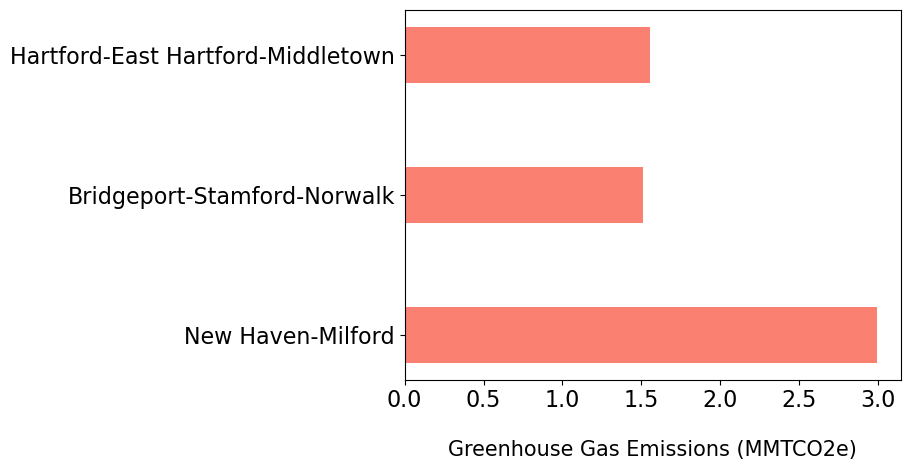

In [44]:
plt.barh(msa, values, 0.4, color="salmon")
plt.xlabel("Greenhouse Gas Emissions (MMTCO2e)",fontsize=15, labelpad=20)

plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)

#plt.show() 

plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/residential-emissions-osmnx.png', dpi=100,bbox_inches='tight')

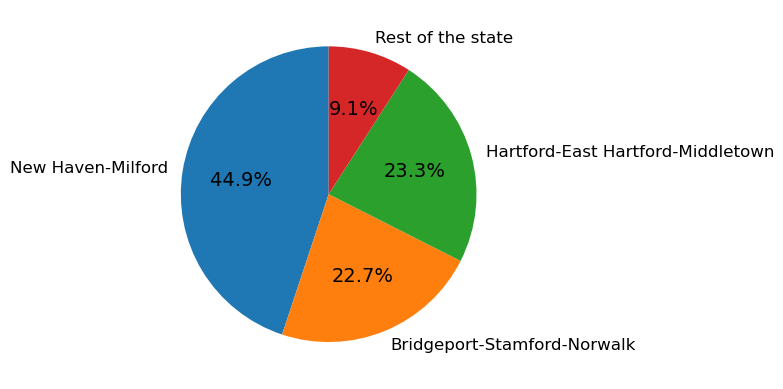

In [36]:
pie_chart = plt.pie(Footprint_ratio, labels=msa, autopct='%1.1f%%', startangle=90, textprops={'size': 14})

# Set font size for pie chart labels
for label in pie_chart[1]:
    label.set_fontsize(12)
    
plt.savefig('C:/Users/peiyaozhao/Documents/GitHub/tracking-msa-ghg/figures/footprint_ratio.png', dpi=100,bbox_inches='tight')

In [37]:
def building_type_count(place_name, building_types):
    graph = ox.graph_from_place(place_name, network_type='all')
    area = ox.geocode_to_gdf(place_name)
    bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    unique_building_types = bldgs['building'].unique()

    # Use the correct variable name (bldgs) instead of bldgs_NewH
    building_type_counts = bldgs['building'].value_counts()

    # Iterate over the building types and counts
    for building_type, count in building_type_counts.items():
        print(f"{building_type}: {count} buildings")
        
    return building_type_counts

In [38]:
NewH = building_type_count(ct_NewH, desired_building_types)
Mids = building_type_count(ct_Mids, desired_building_types)
Tola = building_type_count(ct_Tola, desired_building_types)
Hart = building_type_count(ct_Hart, desired_building_types)
Fair = building_type_count(ct_Fair, desired_building_types)


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


house: 34384 buildings
detached: 1060 buildings
apartments: 839 buildings
roof: 359 buildings
residential: 188 buildings
cabin: 19 buildings
semidetached_house: 8 buildings
static_caravan: 7 buildings
condominium: 3 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


detached: 3477 buildings
house: 2666 buildings
apartments: 208 buildings
roof: 129 buildings
residential: 47 buildings
cabin: 16 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


detached: 552 buildings
house: 461 buildings
apartments: 249 buildings
roof: 68 buildings
residential: 25 buildings
static_caravan: 20 buildings
semidetached_house: 1 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


house: 6297 buildings
detached: 718 buildings
apartments: 615 buildings
residential: 307 buildings
roof: 257 buildings
semidetached_house: 11 buildings
cabin: 10 buildings


C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_23152\4286460642.py:4: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  bldgs = ox.geometries_from_place(place_name, tags={'building': building_types})


house: 14210 buildings
residential: 568 buildings
apartments: 451 buildings
detached: 311 buildings
roof: 240 buildings
cabin: 29 buildings
semidetached_house: 15 buildings
static_caravan: 4 buildings
stilt house: 1 buildings
